<a href="https://colab.research.google.com/github/oulbacha-ilyas/Machine-Learning-For-Stock-Market-Prediction/blob/main/experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Data Preprocessing

In [ ]:
####Selecting the best structure


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import statistics
from datetime import datetime


dataset=pd.read_csv("fixations.csv")
fixationX=dataset[["start timestamp [ns]","end timestamp [ns]","duration [ms]","fixation x [px]"]]

facebook=pd.read_csv("Facebook.csv")
apple=pd.read_csv("Apple.csv")
amazon=pd.read_csv("Amazon.csv")
netflix=pd.read_csv("Netflix.csv")
google=pd.read_csv("Google.csv")


### replacing missing values
mean = facebook['Open'].mean()
facebook['Open'].fillna(mean, inplace=True)
mean = facebook['High'].mean()
facebook['High'].fillna(mean, inplace=True)
mean = facebook['Low'].mean()
facebook['Low'].fillna(mean, inplace=True)
mean = facebook['Close'].mean()
facebook['Close'].fillna(mean, inplace=True)
mean = facebook['Adj Close'].mean()
facebook['Adj Close'].fillna(mean, inplace=True)
mean = facebook['Volume'].mean()
facebook['Volume'].fillna(mean, inplace=True)

mean = apple['Open'].mean()
apple['Open'].fillna(mean, inplace=True)
mean = apple['High'].mean()
apple['High'].fillna(mean, inplace=True)
mean = apple['Low'].mean()
apple['Low'].fillna(mean, inplace=True)
mean = apple['Close'].mean()
apple['Close'].fillna(mean, inplace=True)
mean = apple['Adj Close'].mean()
apple['Adj Close'].fillna(mean, inplace=True)
mean = apple['Volume'].mean()
apple['Volume'].fillna(mean, inplace=True)

mean = amazon['Open'].mean()
amazon['Open'].fillna(mean, inplace=True)
mean = amazon['High'].mean()
amazon['High'].fillna(mean, inplace=True)
mean = amazon['Low'].mean()
amazon['Low'].fillna(mean, inplace=True)
mean = amazon['Close'].mean()
amazon['Close'].fillna(mean, inplace=True)
mean = amazon['Adj Close'].mean()
amazon['Adj Close'].fillna(mean, inplace=True)
mean = amazon['Volume'].mean()
amazon['Volume'].fillna(mean, inplace=True)

mean = netflix['Open'].mean()
netflix['Open'].fillna(mean, inplace=True)
mean = netflix['High'].mean()
netflix['High'].fillna(mean, inplace=True)
mean = netflix['Low'].mean()
netflix['Low'].fillna(mean, inplace=True)
mean = netflix['Close'].mean()
netflix['Close'].fillna(mean, inplace=True)
mean = netflix['Adj Close'].mean()
netflix['Adj Close'].fillna(mean, inplace=True)
mean = netflix['Volume'].mean()
netflix['Volume'].fillna(mean, inplace=True)

mean = google['Open'].mean()
google['Open'].fillna(mean, inplace=True)
mean = google['High'].mean()
google['High'].fillna(mean, inplace=True)
mean = google['Low'].mean()
google['Low'].fillna(mean, inplace=True)
mean = google['Close'].mean()
google['Close'].fillna(mean, inplace=True)
mean = google['Adj Close'].mean()
google['Adj Close'].fillna(mean, inplace=True)
mean = google['Volume'].mean()
google['Volume'].fillna(mean, inplace=True)


facebook['Date']=facebook['Date'].astype('string')
amazon['Date']=amazon['Date'].astype('string')
apple['Date']=apple['Date'].astype('string')
netflix['Date']=netflix['Date'].astype('string')
google['Date']=google['Date'].astype('string')



### changing date to timestamp
format = "%Y-%m-%d"
facebook['timestamp']=np.nan

for i in facebook.index:
  date_string = facebook.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  facebook.iloc[i,7]=timestamp

facebook['Date']=facebook['timestamp']
facebook=facebook.drop(['timestamp'],axis=1)
facebook= facebook.rename(columns = {"Date":"Timestamp"})
facebook.head()

#####
format = "%Y-%m-%d"
amazon['timestamp']=np.nan

for i in amazon.index:
  date_string = amazon.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  amazon.iloc[i,7]=timestamp

amazon['Date']=amazon['timestamp']
amazon=amazon.drop(['timestamp'],axis=1)
amazon= amazon.rename(columns = {"Date":"Timestamp"})
amazon.head()

format = "%Y-%m-%d"
apple['timestamp']=np.nan

for i in apple.index:
  date_string = apple.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  apple.iloc[i,7]=timestamp

apple['Date']=apple['timestamp']
apple=apple.drop(['timestamp'],axis=1)
apple= apple.rename(columns = {"Date":"Timestamp"})
apple.head()

format = "%Y-%m-%d"
netflix['timestamp']=np.nan

for i in netflix.index:
  date_string = netflix.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  netflix.iloc[i,7]=timestamp

netflix['Date']=netflix['timestamp']
netflix=netflix.drop(['timestamp'],axis=1)
netflix= netflix.rename(columns = {"Date":"Timestamp"})
netflix.head()

format = "%Y-%m-%d"
google['timestamp']=np.nan

for i in google.index:
  date_string = google.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  google.iloc[i,7]=timestamp

google['Date']=google['timestamp']
google=google.drop(['timestamp'],axis=1)
google= google.rename(columns = {"Date":"Timestamp"})
google.head()




#####


,Timestamp,Open,High,Low,Close,Adj Close,Volume
0,1.092874e+09,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,1.092960e+09,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,1.093219e+09,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,1.093306e+09,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,1.093392e+09,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [ ]:
all_datasets=pd.DataFrame() 
#all_datasets['Fixation x [px]']=fixationX['fixation x [px]']
all_datasets['Facebook Volume']=facebook['Volume']
all_datasets['Amazon Volume']=amazon['Volume']
all_datasets['Apple Volume']=apple['Volume']
all_datasets['Netflix Volume']=netflix['Volume']
all_datasets['Google Volume']=google['Volume']
print(all_datasets)

      Facebook Volume  Amazon Volume  Apple Volume  Netflix Volume  \
0           573576400       72156000   469033600.0       104790000   
1           168192700       14700000   175884800.0        11104800   
2           101786600        6106800   105728000.0         6609400   
3            73600000        5467200    86441600.0         6757800   
4            50237200       18853200    73449600.0        10154200   
...               ...            ...           ...             ...   
2071         21428300        4591200   238324800.0        47224800   
2072         17374000        9921200    95368000.0        42668500   
2073         14792700        5842200   152129600.0        59518900   
2074         13351100        6474100   115920000.0        59725400   
2075         18677500        5525100   176019200.0        46575900   

      Google Volume  
0          44659000  
1          22834300  
2          18256100  
3          15247300  
4           9188600  
...             ...  
2071 

#2) Data Exploration

In [ ]:
all_datasets.describe()

,Facebook Volume,Amazon Volume,Apple Volume,Netflix Volume,Google Volume
count,2.076000e+03,2.076000e+03,2.076000e+03,2.076000e+03,2.076000e+03
mean,3.265524e+07,1.070780e+07,1.588883e+08,1.355262e+07,1.124819e+07
std,2.906292e+07,9.563826e+06,1.418545e+08,1.581294e+07,8.976511e+06
min,5.913100e+06,4.872000e+05,1.388800e+06,2.856000e+05,1.715600e+06
25%,1.621918e+07,5.530725e+06,7.371280e+07,6.202175e+06,5.348550e+06
50%,2.373235e+07,7.776450e+06,1.295056e+08,9.396100e+06,8.470900e+06
75%,3.889940e+07,1.172195e+07,2.089752e+08,1.536098e+07,1.393290e+07
max,5.735764e+08,1.017972e+08,2.832346e+09,3.234140e+08,8.215110e+07


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

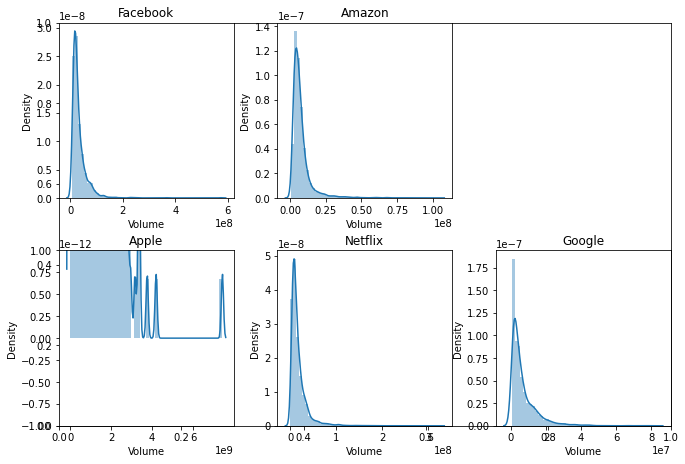

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.distplot(facebook['Volume'],ax=ax1).set(title="Facebook")
sns.distplot(amazon['Volume'],ax=ax2).set(title="Amazon")
sns.distplot(apple['Volume'],ax=ax3).set(title="Apple")
sns.distplot(netflix['Volume'],ax=ax4).set(title="Netflix")
sns.distplot(google['Volume'],ax=ax5).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


###Fixations
###set the table of comparison
results_lr=pd.DataFrame(columns=['Dataset','RMSE Training','RMSE Testing','R²','Adjusted-R²'])





#Facebook
X=facebook[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=facebook["Volume"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Dataset':'Facebook','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)


#Amazon
X=amazon[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=amazon["Volume"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Dataset':'Amazon','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)

#Apple

X=apple[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=apple["Volume"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Dataset':'Apple','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)

#Netflix
X=netflix[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=netflix["Volume"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Dataset':'Netflix','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)


#Google
X=google[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=google["Volume"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

#evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# performance:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Dataset':'Google','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)

print(results_lr)



    Dataset  RMSE Training  RMSE Testing        R²  Adjusted-R²
0  Facebook   2.502544e+07  1.880352e+07  0.372824     0.371006
1    Amazon   6.714988e+06  6.967347e+06  0.197367     0.196543
2     Apple   3.127473e+08  3.448291e+08  0.297798     0.297377
3   Netflix   2.013742e+07  1.620301e+07  0.109601     0.108434
4    Google   6.019284e+06  5.533041e+06  0.561545     0.560893


# 3) Machine Learning Models Comparison

In [ ]:
cor=pd.DataFrame()
cor['Difference']=results_lr['RMSE Training']-results_lr['RMSE Testing']
cor['Ajdusted_R2']=results_lr['Adjusted-R²']



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


       Test  Statistic   p-value
0   Pearson   0.006765  0.991387
1  Spearman   0.006765  0.991387


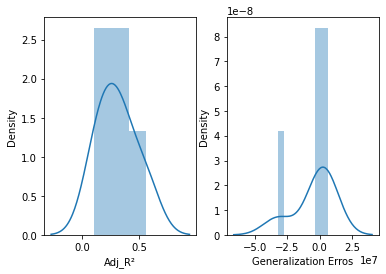

In [ ]:
from matplotlib.pylab import title
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots(1, 2)

#create chart in each subplot
#sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
#sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
sns.distplot(cor['Ajdusted_R2'],ax=axes[0]).set_xlabel("Adj_R²")
sns.distplot(cor['Difference'],ax=axes[1]).set_xlabel("Generalization Erros")
test=pd.DataFrame(columns=['Test','Statistic','p-value'])
pearson,p=pearsonr(cor['Ajdusted_R2'], cor['Difference'])
test=test.append({'Test':'Pearson','Statistic':pearson,'p-value':p},ignore_index=True)
rho,p=pearsonr(cor['Ajdusted_R2'], cor['Difference'])
test=test.append({'Test':'Spearman','Statistic':rho,'p-value':p},ignore_index=True)
print(test)


In [ ]:
###ANN structure on all datasets
activation = ["identity","logistic","tanh","relu"]
solver=["lbfgs","sgd","adam"]


####Fixations

results_ann_fixations=pd.DataFrame(columns=['Activation Function','Loss Function','Training RMSE','Testing RMSE','Difference'])

X=fixationX[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=fixationX["fixation x [px]"]
#split the data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


for i in range(4) :
  for j in range(3):
    model=MLPRegressor(activation=activation[i],solver=solver[j],max_iter=2000)
    Fixation_position= model.fit(X_train,y_train)
    y_pred_test =Fixation_position.predict(X_test)
    y_pred_train =Fixation_position.predict(X_train)

    #print(classifier.predict(X_test))
    if (activation[i] == 'identity') & (solver[j]=='sgd'): rmse ='NaN' 
    else : 
     rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
     rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
     Difference=rmse_train-rmse_test

    #axes[i,j]= plt.axes(projection ='3d')
    #axes[i,j].scatter3D(a,b,y_test, 'blue')
    #axes[i,j].scatter3D(a,b, y_pred_test,color='red' )
    #axes[i,j].set_title("Activation function = {} ,Loss function = {}".format(activation[i],solver[j]))
    #plt.show()
    

    results_ann_fixations=results_ann_fixations.append({"Activation Function":"{}".format(activation[i]) ,"Loss Function":"{}".format(solver[j]),"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)
    
    #print("RMSE :",rmse)
    j+=1
  i+=1




print(results_ann_fixations)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


   Activation Function Loss Function  Training RMSE  Testing RMSE  Difference
0             identity         lbfgs     134.045072    134.387574   -0.342502
1             identity           sgd     134.045072    134.387574   -0.342502
2             identity          adam     134.045299    134.397883   -0.352583
3             logistic         lbfgs     134.045072    134.387574   -0.342502
4             logistic           sgd     134.045216    134.379688   -0.334472
5             logistic          adam     134.322372    135.015122   -0.692749
6                 tanh         lbfgs     134.045072    134.387574   -0.342503
7                 tanh           sgd     134.047519    134.423072   -0.375553
8                 tanh          adam     134.161677    134.731767   -0.570091
9                 relu         lbfgs     134.045072    134.387574   -0.342502
10                relu           sgd     134.045087    134.390158   -0.345071
11                relu          adam     134.046398    134.41323

In [ ]:
import pandas as pd
####Facebook
activation = ["identity","logistic","tanh","relu"]
solver=["lbfgs","sgd","adam"]

results_ann_facebook=pd.DataFrame(columns=['Activation Function','Loss Function','Training RMSE','Testing RMSE','Difference'])

X=facebook[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=facebook["Volume"]
#split the data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


for i in range(4) :
  for j in range(3):
    model=MLPRegressor(activation=activation[i],solver=solver[j],max_iter=2000)
    Fixation_position= model.fit(X_train,y_train)
    y_pred_test =Fixation_position.predict(X_test)
    y_pred_train =Fixation_position.predict(X_train)

    #print(classifier.predict(X_test))
    if (activation[i] == 'identity') & (solver[j]=='sgd'): rmse ='NaN' 
    else : 
     rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
     rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
     Difference=rmse_train-rmse_test

    #axes[i,j]= plt.axes(projection ='3d')
    #axes[i,j].scatter3D(a,b,y_test, 'blue')
    #axes[i,j].scatter3D(a,b, y_pred_test,color='red' )
    #axes[i,j].set_title("Activation function = {} ,Loss function = {}".format(activation[i],solver[j]))
    #plt.show()
    

    results_ann_facebook=results_ann_facebook.append({"Activation Function":"{}".format(activation[i]) ,"Loss Function":"{}".format(solver[j]),"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)
    
    #print("RMSE :",rmse)
    j+=1
  i+=1



print(results_ann_facebook)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: Conver

   Activation Function Loss Function  Training RMSE  Testing RMSE  \
0             identity         lbfgs   3.062662e+07  2.501349e+07   
1             identity           sgd   3.062662e+07  2.501349e+07   
2             identity          adam   4.481685e+07  4.082599e+07   
3             logistic         lbfgs   3.062662e+07  2.501349e+07   
4             logistic           sgd   3.063022e+07  2.502635e+07   
5             logistic          adam   4.486750e+07  4.088082e+07   
6                 tanh         lbfgs   3.062662e+07  2.501349e+07   
7                 tanh           sgd   3.063671e+07  2.501169e+07   
8                 tanh          adam   4.486748e+07  4.088080e+07   
9                 relu         lbfgs   3.062662e+07  2.501349e+07   
10                relu           sgd   4.235153e+07  3.814430e+07   
11                relu          adam   4.485055e+07  4.086247e+07   

      Difference  
0   5.613130e+06  
1   5.613130e+06  
2   3.990855e+06  
3   5.613130e+06  
4   5.6

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
results_ann_facebook.describe()

,Training RMSE,Testing RMSE,Difference
count,1.200000e+01,1.200000e+01,1.200000e+01
mean,3.627925e+07,3.132029e+07,4.958964e+06
std,7.038356e+06,7.846726e+06,8.086862e+05
min,3.062662e+07,2.500984e+07,3.986675e+06
25%,3.062662e+07,2.501349e+07,3.990136e+06
50%,3.063885e+07,2.503818e+07,5.599901e+06
75%,4.482556e+07,4.083542e+07,5.613130e+06
max,4.486750e+07,4.088082e+07,5.618309e+06


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


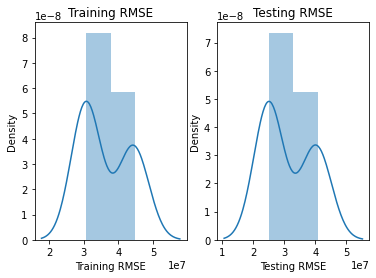

In [ ]:
from matplotlib.pylab import title
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots(1, 2)

#create chart in each subplot
#sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
#sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
sns.distplot(results_ann_facebook['Training RMSE'],ax=axes[0]).set(title="Training RMSE")
sns.distplot(results_ann_facebook['Testing RMSE'],ax=axes[1]).set(title="Testing RMSE")
test=pd.DataFrame(columns=['Test','Statistic','p-value'])
pearson,p=pearsonr(results_ann_facebook['Training RMSE'], results_ann_facebook['Testing RMSE'])
test=test.append({'Test':'Pearson','Statistic':pearson,'p-value':p},ignore_index=True)
rho,p=spearmanr(results_ann_facebook['Training RMSE'], results_ann_facebook['Testing RMSE'])
test=test.append({'Test':'Spearman','Statistic':rho,'p-value':p},ignore_index=True)

In [ ]:

####amazon

results_ann_amazon=pd.DataFrame(columns=['Activation Function','Loss Function','Training RMSE','Testing RMSE','Difference'])

X=amazon[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=amazon["Volume"]
#split the data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


for i in range(4) :
  for j in range(3):
    model=MLPRegressor(activation=activation[i],solver=solver[j],max_iter=2000)
    Fixation_position= model.fit(X_train,y_train)
    y_pred_test =Fixation_position.predict(X_test)
    y_pred_train =Fixation_position.predict(X_train)

    #print(classifier.predict(X_test))
    if (activation[i] == 'identity') & (solver[j]=='sgd'): rmse ='NaN' 
    else : 
     rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
     rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
     Difference=rmse_train-rmse_test

    #axes[i,j]= plt.axes(projection ='3d')
    #axes[i,j].scatter3D(a,b,y_test, 'blue')
    #axes[i,j].scatter3D(a,b, y_pred_test,color='red' )
    #axes[i,j].set_title("Activation function = {} ,Loss function = {}".format(activation[i],solver[j]))
    #plt.show()
    

    results_ann_amazon=results_ann_amazon.append({"Activation Function":"{}".format(activation[i]) ,"Loss Function":"{}".format(solver[j]),"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)
    
    #print("RMSE :",rmse)
    j+=1
  i+=1




print(results_ann_amazon)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-pac

   Activation Function Loss Function  Training RMSE  Testing RMSE  \
0             identity         lbfgs   7.188201e+06  7.481745e+06   
1             identity           sgd   7.188201e+06  7.481745e+06   
2             identity          adam   1.009462e+07  1.032635e+07   
3             logistic         lbfgs   7.188201e+06  7.481745e+06   
4             logistic           sgd   7.189045e+06  7.482998e+06   
5             logistic          adam   1.038803e+07  1.061452e+07   
6                 tanh         lbfgs   7.188201e+06  7.481745e+06   
7                 tanh           sgd   7.189661e+06  7.482566e+06   
8                 tanh          adam   1.038801e+07  1.061450e+07   
9                 relu         lbfgs   7.188201e+06  7.481745e+06   
10                relu           sgd   7.209442e+06  7.504369e+06   
11                relu          adam   1.029513e+07  1.052325e+07   

       Difference  
0  -293543.873162  
1  -293543.873162  
2  -231728.145889  
3  -293543.860580  
4 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:

####apple

results_ann_apple=pd.DataFrame(columns=['Activation Function','Loss Function','Training RMSE','Testing RMSE','Difference'])

X=apple[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=apple["Volume"]
#split the data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


for i in range(4) :
  for j in range(3):
    model=MLPRegressor(activation=activation[i],solver=solver[j],max_iter=2000)
    Fixation_position= model.fit(X_train,y_train)
    y_pred_test =Fixation_position.predict(X_test)
    y_pred_train =Fixation_position.predict(X_train)

    #print(classifier.predict(X_test))
    if (activation[i] == 'identity') & (solver[j]=='sgd'): rmse ='NaN' 
    else : 
     rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
     rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
     Difference=rmse_train-rmse_test

    #axes[i,j]= plt.axes(projection ='3d')
    #axes[i,j].scatter3D(a,b,y_test, 'blue')
    #axes[i,j].scatter3D(a,b, y_pred_test,color='red' )
    #axes[i,j].set_title("Activation function = {} ,Loss function = {}".format(activation[i],solver[j]))
    #plt.show()
    

    results_ann_apple=results_ann_apple.append({"Activation Function":"{}".format(activation[i]) ,"Loss Function":"{}".format(solver[j]),"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)
    
    #print("RMSE :",rmse)
    j+=1
  i+=1




print(results_ann_apple)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: Conver

   Activation Function Loss Function  Training RMSE  Testing RMSE  \
0             identity         lbfgs   3.323652e+08  3.654270e+08   
1             identity           sgd   3.323652e+08  3.654270e+08   
2             identity          adam   4.759491e+08  4.984274e+08   
3             logistic         lbfgs   3.323652e+08  3.654270e+08   
4             logistic           sgd   3.325708e+08  3.656687e+08   
5             logistic          adam   4.767720e+08  4.992092e+08   
6                 tanh         lbfgs   3.323652e+08  3.654270e+08   
7                 tanh           sgd   3.386935e+08  3.714928e+08   
8                 tanh          adam   4.767719e+08  4.992092e+08   
9                 relu         lbfgs   3.323652e+08  3.654270e+08   
10                relu           sgd   3.339408e+08  3.667091e+08   
11                relu          adam   4.764692e+08  4.989215e+08   

      Difference  
0  -3.306172e+07  
1  -3.306172e+07  
2  -2.247828e+07  
3  -3.306172e+07  
4  -3.3

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:

####netflix

results_ann_netflix=pd.DataFrame(columns=['Activation Function','Loss Function','Training RMSE','Testing RMSE','Difference'])

X=netflix[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=netflix["Volume"]
#split the data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


for i in range(4) :
  for j in range(3):
    model=MLPRegressor(activation=activation[i],solver=solver[j],max_iter=2000)
    Fixation_position= model.fit(X_train,y_train)
    y_pred_test =Fixation_position.predict(X_test)
    y_pred_train =Fixation_position.predict(X_train)

    #print(classifier.predict(X_test))
    if (activation[i] == 'identity') & (solver[j]=='sgd'): rmse ='NaN' 
    else : 
     rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
     rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
     Difference=rmse_train-rmse_test

    #axes[i,j]= plt.axes(projection ='3d')
    #axes[i,j].scatter3D(a,b,y_test, 'blue')
    #axes[i,j].scatter3D(a,b, y_pred_test,color='red' )
    #axes[i,j].set_title("Activation function = {} ,Loss function = {}".format(activation[i],solver[j]))
    #plt.show()
    

    results_ann_netflix=results_ann_netflix.append({"Activation Function":"{}".format(activation[i]) ,"Loss Function":"{}".format(solver[j]),"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)
    
    #print("RMSE :",rmse)
    j+=1
  i+=1




print(results_ann_netflix)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: Conver

   Activation Function Loss Function  Training RMSE  Testing RMSE  \
0             identity         lbfgs   2.082908e+07  1.681411e+07   
1             identity           sgd   2.082908e+07  1.681411e+07   
2             identity          adam   2.721665e+07  2.382088e+07   
3             logistic         lbfgs   2.082908e+07  1.681411e+07   
4             logistic           sgd   2.083356e+07  1.680340e+07   
5             logistic          adam   2.739335e+07  2.401537e+07   
6                 tanh         lbfgs   2.082908e+07  1.681411e+07   
7                 tanh           sgd   2.088223e+07  1.682399e+07   
8                 tanh          adam   2.739333e+07  2.401535e+07   
9                 relu         lbfgs   2.082908e+07  1.681411e+07   
10                relu           sgd   2.111778e+07  1.704170e+07   
11                relu          adam   2.731830e+07  2.393280e+07   

      Difference  
0   4.014968e+06  
1   4.014968e+06  
2   3.395769e+06  
3   4.014968e+06  
4   4.0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:

####google

results_ann_google=pd.DataFrame(columns=['Activation Function','Loss Function','Training RMSE','Testing RMSE','Difference'])

X=google[["Timestamp","Open","High","Low","Close","Adj Close"]]
y=google["Volume"]
#split the data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


for i in range(4) :
  for j in range(3):
    model=MLPRegressor(activation=activation[i],solver=solver[j],max_iter=2000)
    Fixation_position= model.fit(X_train,y_train)
    y_pred_test =Fixation_position.predict(X_test)
    y_pred_train =Fixation_position.predict(X_train)

    #print(classifier.predict(X_test))
    if (activation[i] == 'identity') & (solver[j]=='sgd'): rmse ='NaN' 
    else : 
     rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
     rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
     Difference=rmse_train-rmse_test

    #axes[i,j]= plt.axes(projection ='3d')
    #axes[i,j].scatter3D(a,b,y_test, 'blue')
    #axes[i,j].scatter3D(a,b, y_pred_test,color='red' )
    #axes[i,j].set_title("Activation function = {} ,Loss function = {}".format(activation[i],solver[j]))
    #plt.show()
    

    results_ann_google=results_ann_google.append({"Activation Function":"{}".format(activation[i]) ,"Loss Function":"{}".format(solver[j]),"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)
    
    #print("RMSE :",rmse)
    j+=1
  i+=1




print(results_ann_google)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-pac

   Activation Function Loss Function  Training RMSE  Testing RMSE  \
0             identity         lbfgs   8.021504e+06  7.591923e+06   
1             identity           sgd   8.021504e+06  7.591923e+06   
2             identity          adam   1.044471e+07  1.011599e+07   
3             logistic         lbfgs   8.021504e+06  7.591923e+06   
4             logistic           sgd   8.027943e+06  7.598565e+06   
5             logistic          adam   1.058602e+07  1.026174e+07   
6                 tanh         lbfgs   8.021504e+06  7.591923e+06   
7                 tanh           sgd   8.056866e+06  7.629657e+06   
8                 tanh          adam   1.058600e+07  1.026173e+07   
9                 relu         lbfgs   8.021504e+06  7.591923e+06   
10                relu           sgd   8.104638e+06  7.679129e+06   
11                relu          adam   1.053748e+07  1.021170e+07   

       Difference  
0   429580.240239  
1   429580.240239  
2   328717.542796  
3   429580.239060  
4 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
all_results=pd.DataFrame()


In [ ]:
from numpy.random import standard_t

###Dataset 1

#statistical difference of Training RMSE for groups of AF 
difference_statistic=pd.DataFrame(columns=['Group','Phase','Friedman Statistic','p-value'])


s1=results_ann_fixations.loc[results_ann_fixations['Activation Function']=="identity"]
s2=results_ann_fixations.loc[results_ann_fixations['Activation Function']=="logistic"]
s3=results_ann_fixations.loc[results_ann_fixations['Activation Function']=="tanh"]
s4=results_ann_fixations.loc[results_ann_fixations['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'],s4['Training RMSE'])
difference_statistic=difference_statistic.append({'Phase':'Training',"Group":"Activation Functions",'Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing RMSE for groups of AF 



s1=results_ann_fixations.loc[results_ann_fixations['Activation Function']=="identity"]
s2=results_ann_fixations.loc[results_ann_fixations['Activation Function']=="logistic"]
s3=results_ann_fixations.loc[results_ann_fixations['Activation Function']=="tanh"]
s4=results_ann_fixations.loc[results_ann_fixations['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'],s4['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Activation Functions",'Phase':'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)



#statistical difference of Training  RMSE for groups of LF
s1=results_ann_fixations.loc[results_ann_fixations['Loss Function']=="lbfgs"]
s2=results_ann_fixations.loc[results_ann_fixations['Loss Function']=="sgd"]
s3=results_ann_fixations.loc[results_ann_fixations['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions",'Phase':'Training','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing  RMSE for groups of LF
s1=results_ann_fixations.loc[results_ann_fixations['Loss Function']=="lbfgs"]
s2=results_ann_fixations.loc[results_ann_fixations['Loss Function']=="sgd"]
s3=results_ann_fixations.loc[results_ann_fixations['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions","Phase":'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)
print(difference_statistic)

                  Group     Phase  Friedman Statistic   p-value
0  Activation Functions  Training                 2.2  0.531948
1  Activation Functions   Testing                 3.4  0.333965
2        Loss Functions  Training                 7.6  0.022371
3        Loss Functions   Testing                 7.6  0.022371


In [ ]:
from numpy.random import standard_t

###Facebook
#statistical difference of Training RMSE for groups of AF 
difference_statistic=pd.DataFrame(columns=['Group','Phase','Friedman Statistic','p-value'])


s1=results_ann_facebook.loc[results_ann_facebook['Activation Function']=="identity"]
s2=results_ann_facebook.loc[results_ann_facebook['Activation Function']=="logistic"]
s3=results_ann_facebook.loc[results_ann_facebook['Activation Function']=="tanh"]
s4=results_ann_facebook.loc[results_ann_facebook['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'],s4['Training RMSE'])
difference_statistic=difference_statistic.append({'Phase':'Training',"Group":"Activation Functions",'Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing RMSE for groups of AF 



s1=results_ann_facebook.loc[results_ann_facebook['Activation Function']=="identity"]
s2=results_ann_facebook.loc[results_ann_facebook['Activation Function']=="logistic"]
s3=results_ann_facebook.loc[results_ann_facebook['Activation Function']=="tanh"]
s4=results_ann_facebook.loc[results_ann_facebook['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'],s4['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Activation Functions",'Phase':'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)



#statistical difference of Training  RMSE for groups of LF
s1=results_ann_facebook.loc[results_ann_facebook['Loss Function']=="lbfgs"]
s2=results_ann_facebook.loc[results_ann_facebook['Loss Function']=="sgd"]
s3=results_ann_facebook.loc[results_ann_facebook['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions",'Phase':'Training','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing  RMSE for groups of LF
s1=results_ann_facebook.loc[results_ann_facebook['Loss Function']=="lbfgs"]
s2=results_ann_facebook.loc[results_ann_facebook['Loss Function']=="sgd"]
s3=results_ann_facebook.loc[results_ann_facebook['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions","Phase":'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)
print(difference_statistic)

                  Group     Phase  Friedman Statistic   p-value
0  Activation Functions  Training            5.800000  0.121757
1  Activation Functions   Testing            2.600000  0.457490
2        Loss Functions  Training            7.600000  0.022371
3        Loss Functions   Testing            6.533333  0.038133


In [ ]:
from numpy.random import standard_t

###apple
#statistical difference of Training RMSE for groups of AF 
difference_statistic=pd.DataFrame(columns=['Group','Phase','Friedman Statistic','p-value'])


s1=results_ann_apple.loc[results_ann_apple['Activation Function']=="identity"]
s2=results_ann_apple.loc[results_ann_apple['Activation Function']=="logistic"]
s3=results_ann_apple.loc[results_ann_apple['Activation Function']=="tanh"]
s4=results_ann_apple.loc[results_ann_apple['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'],s4['Training RMSE'])
difference_statistic=difference_statistic.append({'Phase':'Training',"Group":"Activation Functions",'Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing RMSE for groups of AF 



s1=results_ann_apple.loc[results_ann_apple['Activation Function']=="identity"]
s2=results_ann_apple.loc[results_ann_apple['Activation Function']=="logistic"]
s3=results_ann_apple.loc[results_ann_apple['Activation Function']=="tanh"]
s4=results_ann_apple.loc[results_ann_apple['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'],s4['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Activation Functions",'Phase':'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)



#statistical difference of Training  RMSE for groups of LF
s1=results_ann_apple.loc[results_ann_apple['Loss Function']=="lbfgs"]
s2=results_ann_apple.loc[results_ann_apple['Loss Function']=="sgd"]
s3=results_ann_apple.loc[results_ann_apple['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions",'Phase':'Training','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing  RMSE for groups of LF
s1=results_ann_apple.loc[results_ann_apple['Loss Function']=="lbfgs"]
s2=results_ann_apple.loc[results_ann_apple['Loss Function']=="sgd"]
s3=results_ann_apple.loc[results_ann_apple['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions","Phase":'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)
print(difference_statistic)

                  Group     Phase  Friedman Statistic   p-value
0  Activation Functions  Training                 1.8  0.614935
1  Activation Functions   Testing                 0.6  0.896432
2        Loss Functions  Training                 7.6  0.022371
3        Loss Functions   Testing                 7.6  0.022371


In [ ]:
from numpy.random import standard_t

###amazon
#statistical difference of Training RMSE for groups of AF 
difference_statistic=pd.DataFrame(columns=['Group','Phase','Friedman Statistic','p-value'])


s1=results_ann_amazon.loc[results_ann_amazon['Activation Function']=="identity"]
s2=results_ann_amazon.loc[results_ann_amazon['Activation Function']=="logistic"]
s3=results_ann_amazon.loc[results_ann_amazon['Activation Function']=="tanh"]
s4=results_ann_amazon.loc[results_ann_amazon['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'],s4['Training RMSE'])
difference_statistic=difference_statistic.append({'Phase':'Training',"Group":"Activation Functions",'Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing RMSE for groups of AF 



s1=results_ann_amazon.loc[results_ann_amazon['Activation Function']=="identity"]
s2=results_ann_amazon.loc[results_ann_amazon['Activation Function']=="logistic"]
s3=results_ann_amazon.loc[results_ann_amazon['Activation Function']=="tanh"]
s4=results_ann_amazon.loc[results_ann_amazon['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'],s4['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Activation Functions",'Phase':'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)



#statistical difference of Training  RMSE for groups of LF
s1=results_ann_amazon.loc[results_ann_amazon['Loss Function']=="lbfgs"]
s2=results_ann_amazon.loc[results_ann_amazon['Loss Function']=="sgd"]
s3=results_ann_amazon.loc[results_ann_amazon['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions",'Phase':'Training','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing  RMSE for groups of LF
s1=results_ann_amazon.loc[results_ann_amazon['Loss Function']=="lbfgs"]
s2=results_ann_amazon.loc[results_ann_amazon['Loss Function']=="sgd"]
s3=results_ann_amazon.loc[results_ann_amazon['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions","Phase":'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)
print(difference_statistic)

                  Group     Phase  Friedman Statistic   p-value
0  Activation Functions  Training            0.931034  0.817933
1  Activation Functions   Testing            0.600000  0.896432
2        Loss Functions  Training            7.600000  0.022371
3        Loss Functions   Testing            7.600000  0.022371


In [ ]:
from numpy.random import standard_t

###netflix
#statistical difference of Training RMSE for groups of AF 
difference_statistic=pd.DataFrame(columns=['Group','Phase','Friedman Statistic','p-value'])


s1=results_ann_netflix.loc[results_ann_netflix['Activation Function']=="identity"]
s2=results_ann_netflix.loc[results_ann_netflix['Activation Function']=="logistic"]
s3=results_ann_netflix.loc[results_ann_netflix['Activation Function']=="tanh"]
s4=results_ann_netflix.loc[results_ann_netflix['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'],s4['Training RMSE'])
difference_statistic=difference_statistic.append({'Phase':'Training',"Group":"Activation Functions",'Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing RMSE for groups of AF 



s1=results_ann_netflix.loc[results_ann_netflix['Activation Function']=="identity"]
s2=results_ann_netflix.loc[results_ann_netflix['Activation Function']=="logistic"]
s3=results_ann_netflix.loc[results_ann_netflix['Activation Function']=="tanh"]
s4=results_ann_netflix.loc[results_ann_netflix['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'],s4['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Activation Functions",'Phase':'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)



#statistical difference of Training  RMSE for groups of LF
s1=results_ann_netflix.loc[results_ann_netflix['Loss Function']=="lbfgs"]
s2=results_ann_netflix.loc[results_ann_netflix['Loss Function']=="sgd"]
s3=results_ann_netflix.loc[results_ann_netflix['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions",'Phase':'Training','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing  RMSE for groups of LF
s1=results_ann_netflix.loc[results_ann_netflix['Loss Function']=="lbfgs"]
s2=results_ann_netflix.loc[results_ann_netflix['Loss Function']=="sgd"]
s3=results_ann_netflix.loc[results_ann_netflix['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions","Phase":'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)
print(difference_statistic)

                  Group     Phase  Friedman Statistic   p-value
0  Activation Functions  Training            5.800000  0.121757
1  Activation Functions   Testing            1.800000  0.614935
2        Loss Functions  Training            7.600000  0.022371
3        Loss Functions   Testing            6.533333  0.038133


In [ ]:
from numpy.random import standard_t

###google
#statistical difference of Training RMSE for groups of AF 
difference_statistic=pd.DataFrame(columns=['Group','Phase','Friedman Statistic','p-value'])


s1=results_ann_google.loc[results_ann_google['Activation Function']=="identity"]
s2=results_ann_google.loc[results_ann_google['Activation Function']=="logistic"]
s3=results_ann_google.loc[results_ann_google['Activation Function']=="tanh"]
s4=results_ann_google.loc[results_ann_google['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'],s4['Training RMSE'])
difference_statistic=difference_statistic.append({'Phase':'Training',"Group":"Activation Functions",'Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing RMSE for groups of AF 



s1=results_ann_google.loc[results_ann_google['Activation Function']=="identity"]
s2=results_ann_google.loc[results_ann_google['Activation Function']=="logistic"]
s3=results_ann_google.loc[results_ann_google['Activation Function']=="tanh"]
s4=results_ann_google.loc[results_ann_google['Activation Function']=="relu"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'],s4['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Activation Functions",'Phase':'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)



#statistical difference of Training  RMSE for groups of LF
s1=results_ann_google.loc[results_ann_google['Loss Function']=="lbfgs"]
s2=results_ann_google.loc[results_ann_google['Loss Function']=="sgd"]
s3=results_ann_google.loc[results_ann_google['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Training RMSE'], s2['Training RMSE'], s3['Training RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions",'Phase':'Training','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


#statistical difference of testing  RMSE for groups of LF
s1=results_ann_google.loc[results_ann_google['Loss Function']=="lbfgs"]
s2=results_ann_google.loc[results_ann_google['Loss Function']=="sgd"]
s3=results_ann_google.loc[results_ann_google['Loss Function']=="adam"]

statistic,pvalue=stats.friedmanchisquare(s1['Testing RMSE'], s2['Testing RMSE'], s3['Testing RMSE'])
difference_statistic=difference_statistic.append({"Group":"Loss Functions","Phase":'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)
print(difference_statistic)

                  Group     Phase  Friedman Statistic   p-value
0  Activation Functions  Training            0.931034  0.817933
1  Activation Functions   Testing            5.800000  0.121757
2        Loss Functions  Training            7.600000  0.022371
3        Loss Functions   Testing            7.600000  0.022371


In [ ]:
####testing the RMSE tesing differences between all datasets
difference_statistic=pd.DataFrame(columns=['Phase','Friedman Statistic','p-value'])
s1=results_ann_fixations.iloc[0:11,2]
s2=results_ann_facebook.iloc[0:11,2]
s3=results_ann_apple.iloc[0:11,2]
s4=results_ann_amazon.iloc[0:11,2]
s5=results_ann_netflix.iloc[0:11,2]
s6=results_ann_google.iloc[0:11,2]

statistic,pvalue=stats.friedmanchisquare(s1,s2,s3,s4,s5,s6)
difference_statistic=difference_statistic.append({'Phase':'Training','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)


s1=results_ann_fixations.iloc[0:11,3]
s2=results_ann_facebook.iloc[0:11,3]
s3=results_ann_apple.iloc[0:11,3]
s4=results_ann_amazon.iloc[0:11,3]
s5=results_ann_netflix.iloc[0:11,3]
s6=results_ann_google.iloc[0:11,3]

statistic,pvalue=stats.friedmanchisquare(s1,s2,s3,s4,s5,s6)
difference_statistic=difference_statistic.append({'Phase':'Testing','Friedman Statistic':statistic,'p-value':pvalue},ignore_index=True)

print(difference_statistic)


      Phase  Friedman Statistic       p-value
0  Training           55.000000  1.305362e-10
1   Testing           53.753247  2.355385e-10
